# 将bytes文件转化为bmp图像

In [34]:
import numpy as np
from PIL import Image

In [35]:
bytes_path = "/share/mal/kaggle/train/8va102hpJn5DVLe9i6Fq.bytes"
bmp_path = "/root/test.bmp"

In [36]:
def bytes2bmp(bytes_path, bmp_path):
    WIDTH = 224
    
    blist = [] # byte list 
    with open(bytes_path) as f:
        for line in f:
            words = line.split(' ')
            words = words[1:] # ignore the address column
            for word in words:
                if word not in ["??", "??\n"]: # filter "??"
                    blist.append(int(word, 16)) # conver hex string to int
    b_mat = np.asarray(blist, dtype=np.uint8)
    height = len(b_mat) // WIDTH
    b_mat = b_mat[0:WIDTH*height]
    b_mat = np.reshape(b_mat, (-1, WIDTH)) 
    img = Image.fromarray(b_mat)
    img.save(bmp_path)
    return img

In [37]:
b_mat = bytes2bmp(bytes_path, bmp_path)

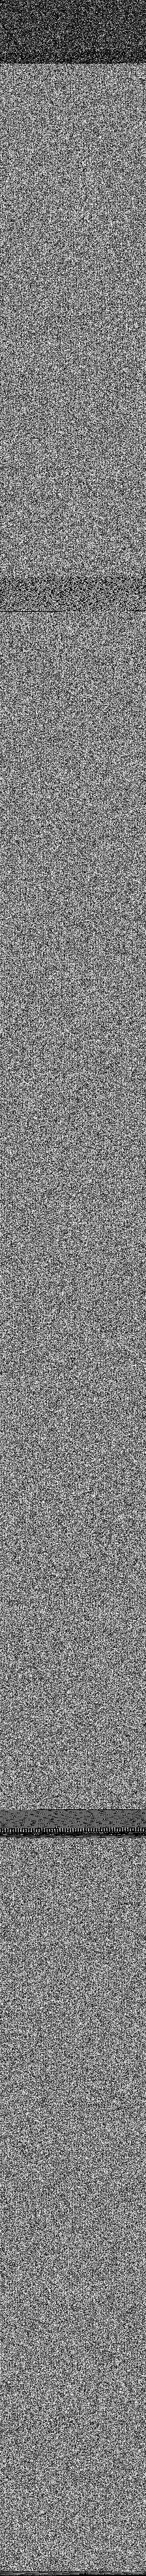

In [42]:
b_mat

# 将bmp转化为png

In [38]:
png_path = "/root/test.png"

In [39]:
def bmp2png(bmp_path, png_path):
    bmp = Image.open(bmp_path)
    bmp_mat = np.asarray(bmp, dtype=np.uint8)
    png_mat = np.reshape(bmp_mat, (bmp_mat.shape[0], bmp_mat.shape[1], 1))
    png_mat = np.repeat(png_mat, 3, axis=2) # 在第2个维度重复3遍即可
    png = Image.fromarray(png_mat, 'RGB')
    png.save(png_path)
    return png

In [40]:
png = bmp2png(bmp_path, png_path)

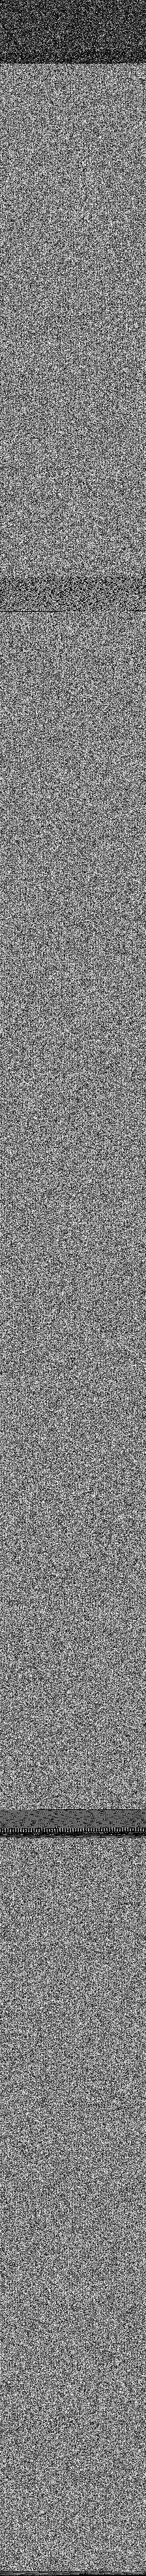

In [41]:
png